# Regularizacija

Do sada smo diskutovali problem loše uslovljenih matrica i njihovu numeričku nestabilnost. U ovoj svesci upoznaćemo neke tehnike koje mogu da poprave korišćenje ovakvih matrica. Razmotrićemo primer rešavanja preuslovljenih sistema i grebene linearne regresije.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Tihonovljeva regularizacija

Posmatrajmo preodređeni sistem $Ax = b$. Ukoliko je matrica $A^TA$ loše uslovljena kod problema najmanjih kvadrata umesto rešavanja osnovnog problema $$min_{x} \|A\cdot x - b\|^2$$ može se rešavati problem $$min_{x} \|A\cdot x - b\|^2 + \alpha ||x||^2$$. Parametar $\alpha$ se zove regularizacioni parametar, a samo rešenje $x$ ima formu $x=(A^{T}A + \alpha I)^{-1}A^{T}b$. 

### Rešavanje loše uslovljenih sistema

Kao poznatu klasu loše uslovljenih matrica naveli smo Hilbertove matrice. Podsetimo se, Hilbertova matrica reda $n$ je matrica čiji su elementi oblika $H_{i, j} = \frac{1}{i+j-1}$ za i, j = 1, 2, 3, ...  Na primer, Hilbertova matrice reda tri je $
\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{3} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} \\
\end{bmatrix}
$.

Uveli smo i funkciju koja kreira Hilbertovu matricu reda $n$.

In [2]:
def hilbert_matrix(n):
    H = np.zeros((n, n))

    for i in range(0, n):
        for j in range(0, n):
            H[i, j] = 1 / ((i + 1) + (j + 1) - 1)
            
    return H

Uvedimo dalje vektor $b$ takav da je vektor jedinica $x$ rešenje sistema $Hx=b$. Elementi vektora $b$ su određeni jednačinom $$b_i = \sum_{j=1}^{j=n}{\frac{1}{i+j-1}}$$, a da bismo mogli da pratimo ponašanja sistema $Hx=b$ posmatraćemo i varijante vektora $b$ određene sa $$b_i = \sum_{j=1}^{j=n}{\frac{1}{i+j-1}} + \sigma R(i)$$ u kojima parametar $\sigma$ predstavlja neku malu vrednost, a $R(i)$ slučajan broj iz intervala $[-1, 1]$.

Za kreiranje takvih vektora koristićemo funkciju `b_values`.

In [3]:
def b_values(n, sigma):
    b = np.zeros(n)
    
    for i in range(0, n):
        b[i] = np.sum ([ 1/ ( (i+1) + (j+1) -1) for j in range(0, n)]) + sigma * np.random.uniform(-1, 1)
        
    return b

Za rešavanje sistema $Hx=b$ možemo koristiti funkciju `solve_hilbert_system`:

In [4]:
def solve_hilbert_system(n, sigma):
    H = hilbert_matrix(n)
    b = b_values(n, sigma)
    
    return np.linalg.inv(H).dot(b)

Za rešavanje regularizovane varijante sistema možemo koristiti funkciju `solve_regularized_hilbert_system`. Neka podrazumevana vrednost parametra regularizacije bude $0.5$. Njegovo optimalno određivanje ćemo diskutovati u nastavku.

In [5]:
def solve_regularized_hilbert_system(n, sigma, alpha=0.5):
    H = hilbert_matrix(n)
    b = b_values(n, sigma)

    return np.linalg.inv(H.T.dot(H) + alpha * np.eye(n)).dot(H.T).dot(b)

U slučaju kada je $\sigma=10^{-5}$ za Hilbertovu matricu reda deset, funkcije daju prilično različita rešenja. Podsetimo se, vektor jedinica je tačno rešenje sistema $Hx=b$.

In [6]:
n = 10
sigma=10**-5

In [7]:
x_true = np.ones(n)

In [8]:
x = solve_hilbert_system(n, sigma)

In [9]:
x

array([-6.53480322e+01,  5.75367075e+03, -1.22826081e+05,  1.11852920e+06,
       -5.34161384e+06,  1.46966878e+07, -2.41274865e+07,  2.33264628e+07,
       -1.22498639e+07,  2.69447893e+06])

In [10]:
x_regularized = solve_regularized_hilbert_system(n, sigma)

In [11]:
x_regularized

array([1.41271053, 0.99871436, 0.79828806, 0.67227022, 0.58361342,
       0.51706935, 0.46493625, 0.42281685, 0.38798429, 0.35864313])

In [12]:
print('Greska sistema: ', np.linalg.norm(x - x_true))
print('Greska regularizovanog sistema: ', np.linalg.norm(x_regularized -  x_true))

Greska sistema:  39107167.533450395
Greska regularizovanog sistema:  1.459575761569905


Da bismo mogli da ispratimo red veličine promene elemenata rešenja, prikazaćemo grafički njihova odstupanja od tačne vrednosti. 

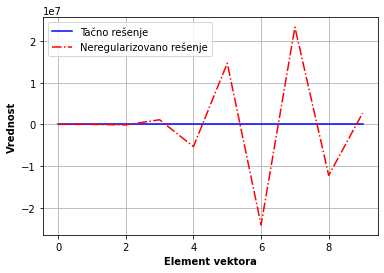

In [13]:
t = np.arange(0, n)
plt.plot(t, x_true, '-b', label='Tačno rešenje')
plt.plot(t, x, '-.r', label='Neregularizovano rešenje')
plt.xlabel('Element vektora', fontweight='bold')
plt.ylabel('Vrednost', fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

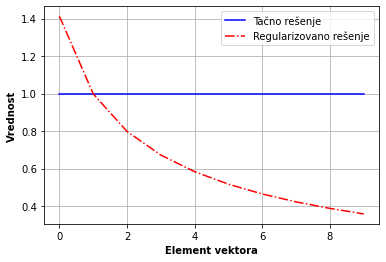

In [14]:
t = np.arange(0, n)
plt.plot(t, x_true, '-b', label='Tačno rešenje')
plt.plot(t, x_regularized, '-.r', label='Regularizovano rešenje')
plt.xlabel('Element vektora', fontweight='bold')
plt.ylabel('Vrednost', fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

Ovde je važno primetiti da su skale vrednosti sa različitim redovima veličina.

Možemo da prikažemo i kako se ponaša norma razlike tačnog i regularizovanog rešenja za različite vrednosti regularizacionog parametra $\alpha$.

In [15]:
alphas = [10**i for i in range(-10, 10)]
errors = []

for alpha in alphas:
    x_regularized = solve_regularized_hilbert_system(n, sigma, alpha)
    error = np.linalg.norm(x_true-x_regularized)
    errors.append(error)

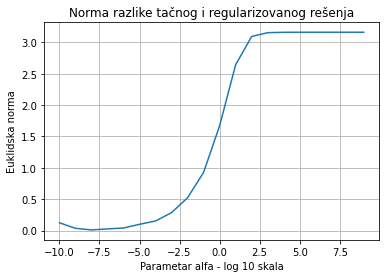

In [16]:
plt.plot(np.arange(-10, 10), errors)
plt.title('Norma razlike tačnog i regularizovanog rešenja')
plt.xlabel('Parametar alfa - log 10 skala')
plt.ylabel('Euklidska norma')
plt.grid(True)
plt.show()

U praksi biramo onu vrednost parametra $\alpha$ tako da je greška koja se dobija najmanja.

In [17]:
alpha_index = np.argmin(errors)
alpha = alphas[alpha_index]

In [18]:
print('Vrednost parametra alfa sa najmanjom greškom: ', alpha)

Vrednost parametra alfa sa najmanjom greškom:  1e-08


### Grebena regresija

U kontekstu linearne regresije pri rešavanju sistema $A\beta = Y$ metodom najmanjih kvadrata, gde se minimizuje vrednost izraza $||Y - \beta A||_2^2$ i čije je rešenje dato u obliku $\beta=(A^{T}A)^{-1}A^{T}Y$ može se posmatrati regularizovana forma kojom se vrši minimizacija $||Y - \beta A||_2^2 + \alpha ||\beta||_2^2$ za pogodno izabran hiperparametar $\alpha$. Umesto linearne, tada se govori o grebenoj regresiji, a izraz $\alpha ||\beta||_2^2$ se naziva regularizacioni član. Ovde je važno naglasiti da se prilikom računanja norme $||\beta||$ ne uzima u obzir slobodan član $\beta_0$.

Dalje ćemo na osnovu podataka u datoteci *advertising.csv* koja sumira statistike u vezi sa reklamiranjima i ostvarenom zaradom, kreirati grebeni model koji može da predvidi zaradu. Demonstriraćemo i tehniku za određivanje optimalne vrednosti hiperparametara iz zadatog skupa koja koristi validacioni skup.

In [19]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

Najpre učitajmo podatke i izvucimo osnovne informacije o njima.

In [20]:
data = pd.read_csv('data/advertising.csv', index_col=0)
data.shape

(200, 4)

In [21]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Zaključujemo da postoji 200 unosa sa 4 numeričke kolone i da u skupu nema nedostajućih vrednosti.

Kolona *Sales* sadrži vrednosti koje želimo da predviđamo. Nju ćemo sačuvati kao promenljivu $y$, a preostale kolone ćemo sačuvati u matrici $X$.

In [23]:
y = data['Sales']

In [24]:
y.shape

(200,)

In [25]:
X = data.drop(columns=['Sales'])

In [26]:
X.shape

(200, 3)

In [27]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


Matricu nezavisnih promenljivih $X$ i vektor zavisnih promenljivih $y$ ćemo podeliti na skup za treniranje, skup za validaciju i skup za testiranje. Ideja je da na skupu za testiranje testiramo performanse naših modela, da validacioni skup iskoristimo za ocenu optimalne vrednosti regularizacionog hiperparametra, a da skup za treniranje iskoristimo za samo treniranje modela. Razmera podele ovih skupova će biti 60%: 20%: 20%. Ovakva podela skup će pomoći da se izbegne problem preprilagođavanja (engl. *overfitting*) modela podacima.

<img src='assets/train_validation_test.png'>

Za kreiranje ovih skupova možemo iskoristiti funkciju `train_test_split`. Njoj ćemo posebno preko parametra `test_size` naglasiti koliki treba da bude odnos kreiranih skupova. Da bi eksperiment mogli da reprodukujemo, fiksiraćemo i vrednost parametra `random_state`.

In [28]:
X_train_validation, X_test, y_train_valiadaion, y_test = model_selection.train_test_split(X, y, random_state=42, test_size=0.2)

In [29]:
X_train_validation.shape

(160, 3)

In [30]:
X_test.shape

(40, 3)

In [31]:
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X_train_validation, y_train_valiadaion, random_state=42, test_size=0.2)

In [32]:
X_train.shape

(128, 3)

In [33]:
X_validation.shape

(32, 3)

Nadalje možemo ispisati neke osnovne informacije o skupu za treniranje.

In [34]:
X_train.describe()

,TV,Radio,Newspaper
count,128.000000,128.000000,128.000000
mean,155.270313,23.799219,30.976562
std,85.664252,14.450439,19.991024
min,0.700000,0.300000,0.300000
25%,88.700000,10.950000,15.400000
50%,169.850000,22.950000,28.150000
75%,224.450000,37.625000,45.750000
max,296.400000,49.600000,100.900000


Prilikom obučavanja modela linearne regresije može se desiti da su numeričke vrednosti podataka neuravnotežene, na primer, da je za neke atribute maksimalna vrednosti nekoliko stotina, a za druge nekoliko jedinica. Da bismo mogli lakše da interpretiramo tako dobijene rezultate, podatke `standardizujemo` tako što ih transformišemo (po kolonama) tako da njihova srednja vrednost bude 0, a standardna devijacija 1. Osim ove svrhe, standardizacija podataka utiče na stabilnost i brzinu treniranja modela pa ju je poželjno uvek primenjivati. Za samu standardizaciju koristićemo klasu `StandardScaler` biblioteke `sklearn`. 

In [35]:
from sklearn import preprocessing

In [36]:
scaler = preprocessing.StandardScaler()

Funkcijom `fit` se izračunavaju srednje vrednosti i varijanse po kolonama. Važno je naglasiti da se funkcija `fit` poziva nad skupom za treniranje.

In [37]:
scaler.fit(X_train)

StandardScaler()

Zatim se ovako izračunate vrednosti koriste za transformaciju preostalih skupova. 

In [38]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

Pogledajmo kako izgledaju metrike skupa nakon standardizacije po kolonama:

In [39]:
np.mean(X_train, axis=0)

array([ 1.38777878e-16, -1.11022302e-16,  2.77555756e-17])

In [40]:
np.std(X_train, axis=0)

array([1., 1., 1.])

Sada možemo da odredimo model linearne regresije, a probaćemo i sa dva modela grebene regresije sa, na primer, parametrima $\alpha = 0.5$ i $\alpha = 10^{10}$. U sva tri slučaja, izračunaćemo i srednjekvadratnu grešku. Za grebenu regresiju se na nivou biblioteke koristi klasa `Ridge`. Način korišćenja je sličan načinu korišćenja klase `LinearRegression` uz dodatak vrednosti parametra $\alpha$.

In [41]:
linreg_model = linear_model.LinearRegression()
linreg_model.fit(X_train, y_train)
y_predict = linreg_model.predict(X_test)
score = metrics.mean_squared_error(y_test, y_predict)
score

3.0867631416028654

In [42]:
ridge_model_1 = linear_model.Ridge(alpha=0.5)
ridge_model_1.fit(X_train, y_train)
y_predict = ridge_model_1.predict(X_test)
score = metrics.mean_squared_error(y_test, y_predict)
score

3.0937137198292723

In [43]:
ridge_model_2 = linear_model.Ridge(alpha=10**10, normalize=True)
ridge_model_2.fit(X_train, y_train)
y_predict = ridge_model_2.predict(X_test)
score = metrics.mean_squared_error(y_test, y_predict)
score

32.18129149734646

Vidimo da u grebena regresija daje lošiji rezultat od linearne, ali da su opsezi grešaka koje pravi različiti. Ovo nas motiviše da razmotrimo različite vrednosti parametra $\alpha$. Ispitaćemo 100 različitih vrednosti između $10^{-5}$ i $10^{5}$ (razmatramo različite redove veličine).

In [44]:
alphas = 10 ** np.linspace(-5, 5, 100)

Zatim ćemo za svaku vrednost parametra $\alpha$ odrediti grebeni model i oceniti njegovu srednjekvadratnu grešku na validacionom skupu. Dobijene greške ćemo čuvati u posebnom nizu za dalju analizu. 

In [45]:
errors = np.empty(0)

for alpha in alphas:
    model = linear_model.Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_validation)
    error = metrics.mean_squared_error(y_validation, y_predict)
    errors = np.append(errors, error)

Nacrtajmo grafik zavisnosti greške u zavisnosti od parametra $\alpha$. Zbog načina izbora parametra $\alpha$ tj. opsega vrednosti koje uzima, iskoristićemo logaritamsku skalu zarad bolje preglednosti. 

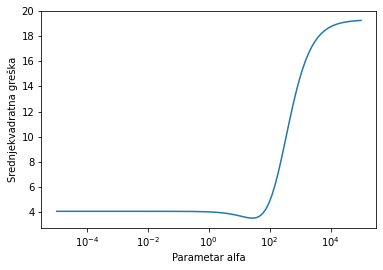

In [46]:
plt.plot(alphas, errors)
plt.xlabel('Parametar alfa')
plt.ylabel('Srednjekvadratna greška')
plt.xscale('log')
plt.show()

Za finalnu vrednost parametra $\alpha$ odabraćemo onu za koju model ima najmanju grešku.

In [47]:
optimal_alpha = alphas[errors.argmin()]

In [48]:
optimal_alpha

29.150530628251758

Sada možemo odrediti konačan model i dati ocenu njegove greške na skupu za testiranje.

In [49]:
final_model = linear_model.Ridge(alpha=optimal_alpha)
final_model.fit(X_train, y_train)
y_predict = final_model.predict(X_test)
score = metrics.mean_squared_error(y_test, y_predict)
score

4.2012699900731025

Možemo ispisati i koeficijent determinacije našeg modela. On ukazuje da postoji još prostora za poboljšanje našeg modela.

In [50]:
metrics.r2_score(y_test, y_predict)

0.866895068307198

Zanimljivo je ispratiti i promenu vrednosti koeficijenata dobijenih modela u zavisnosti od jačine regularizacije.

In [51]:
coefs_tv = []
coefs_radio = []
coefs_newspaper = []

L2s = []

for alpha in alphas:
    model = linear_model.Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    coefs_tv.append(model.coef_[0])
    coefs_radio.append(model.coef_[1])
    coefs_newspaper.append(model.coef_[2])

    L2 = alpha*np.linalg.norm(model.coef_)
    L2s.append(L2)

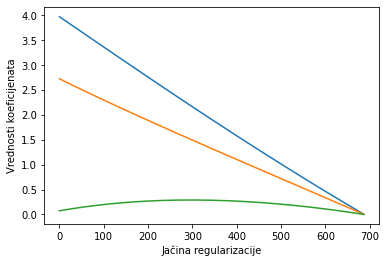

In [52]:
plt.plot(L2s, coefs_tv, label='tv')
plt.plot(L2s, coefs_radio, label='radio')
plt.plot(L2s, coefs_newspaper, label='newspaper')

plt.xlabel('Jačina regularizacije')
plt.ylabel('Vrednosti koeficijenata')
plt.show()

Vidimo da sa povećanjem regularizacije, koeficijenti modela teže nuli. Napomenimo da se slobodni član (intersept) modela ne uzima u obzir prilikom računanja jačine regularizacije.

Kada pristignu podaci o novom reklamiranju, kreirani model možemo iskoristiti za predikciju. U našem slučaju su novi podaci nasumični celi brojevi. Važno je napomenuti da pre nego li se izvrši predikcija modela, nove podatke treba standardizovati.

In [53]:
new_advertising_data = np.random.randint(0, 100, X.shape[1])
new_advertising_data = scaler.transform([new_advertising_data])
new_sales = final_model.predict(new_advertising_data)

In [54]:
print('Predviđena zarada: ', new_sales[0])

Predviđena zarada:  15.659449649730934
